[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]
[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]
Predicted profit: 8000



C:\Users\Jaswanth K\AppData\Local\Temp\ipykernel_26476\1950041935.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted profit: %d\n" % pred)


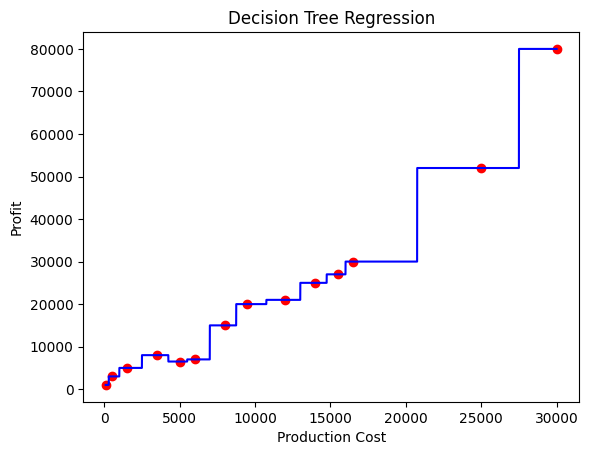

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('game_data.csv')

X = df[['ProductionCost']].values
Y = df['Profit'].values

print(X)
print(Y)

reg = DecisionTreeRegressor(random_state=0)
reg.fit(X, Y)

pred = reg.predict([[3750]])
print("Predicted profit: %d\n" % pred)

X_grid = np.arange(min(X)[0], max(X)[0], 0.01).reshape(-1, 1)
plt.scatter(X, Y, color='red')
plt.plot(X_grid, reg.predict(X_grid), color='blue')
plt.xlabel('Production Cost')
plt.ylabel('Profit')
plt.title('Decision Tree Regression')
plt.show()


        PC1       PC2       PC3
0 -2.264703  0.480027  0.127706
1 -2.080961 -0.674134  0.234609
2 -2.364229 -0.341908 -0.044201
3 -2.299384 -0.597395 -0.091290
4 -2.389842  0.646835 -0.015738


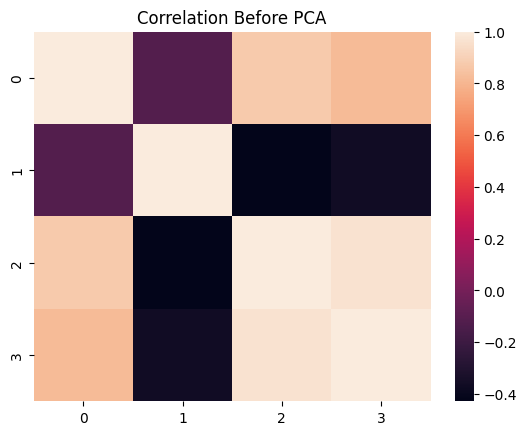

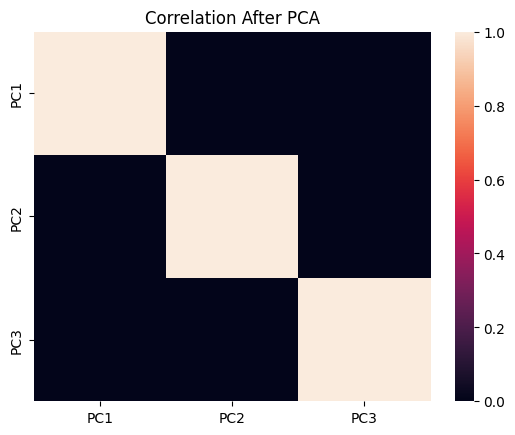

In [10]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

scaled = pd.DataFrame(StandardScaler().fit_transform(df))

plt.figure()
sns.heatmap(scaled.corr())
plt.title('Correlation Before PCA')

pca = PCA(n_components=3)
data_pca = pd.DataFrame(pca.fit_transform(scaled), columns=['PC1','PC2','PC3'])
print(data_pca.head())

plt.figure()
sns.heatmap(data_pca.corr())
plt.title('Correlation After PCA')

plt.show()


In [18]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

data = pd.DataFrame({
    'EmailText': [
        'Claim your free vacation now!', 'Project update attached',
        'Don’t miss this limited-time offer', 'See you at the meeting',
        'Congratulations! You have been selected', 'Can you send the report?',
        'Urgent: Verify your account', 'Lunch at 1pm?', 
        'Winner! Click to claim your reward', 'The invoice has been generated',
        'Earn cash working from home', 'Let’s discuss tomorrow’s task',
        'Final notice: payment overdue', 'Team meeting rescheduled',
        'You’ve been chosen to receive a gift card', 'Reminder: dentist appointment',
        'Cheap luxury watches available now', 'Draft proposal ready for review',
        'Exclusive deal just for you', 'Catch you later at the gym'
    ],
    'Label': [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]
})

X = data['EmailText'].values
y = data['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

clf = SVC(kernel='rbf', random_state=42)
clf.fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))


Accuracy: 0.5


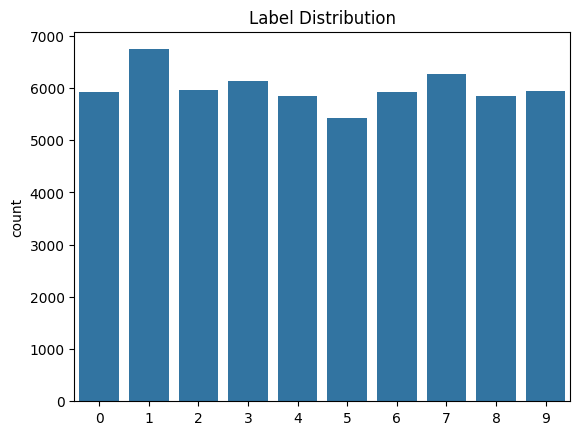

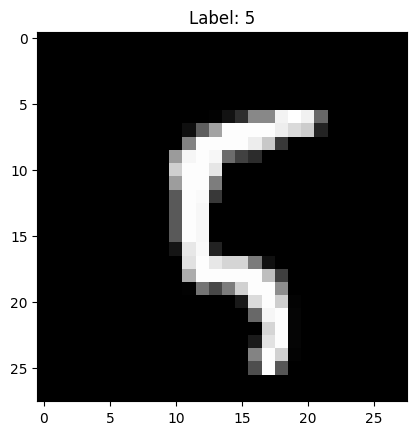

C:\Users\Jaswanth K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 145s 167ms/step - accuracy: 0.8351 - loss: 0.5015 - val_accuracy: 0.9880 - val_loss: 0.0413
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 125s 148ms/step - accuracy: 0.9770 - loss: 0.0772 - val_accuracy: 0.9880 - val_loss: 0.0554
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 126s 150ms/step - accuracy: 0.9828 - loss: 0.0586 - val_accuracy: 0.9925 - val_loss: 0.0288
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 128s 152ms/step - accuracy: 0.9860 - loss: 0.0473 - val_accuracy: 0.9920 - val_loss: 0.0284
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 128s 152ms/step - accuracy: 0.9881 - loss: 0.0419 - val_accuracy: 0.9932 - val_loss: 0.0262


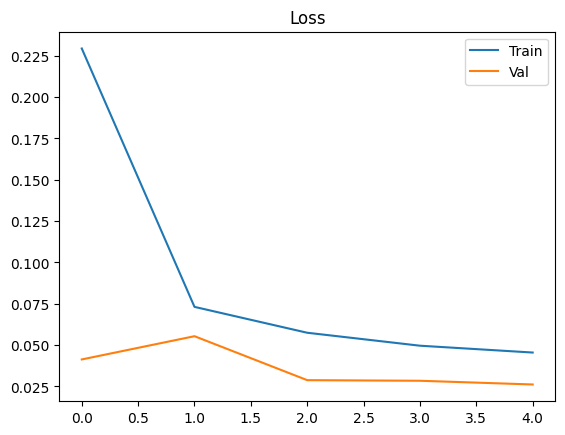

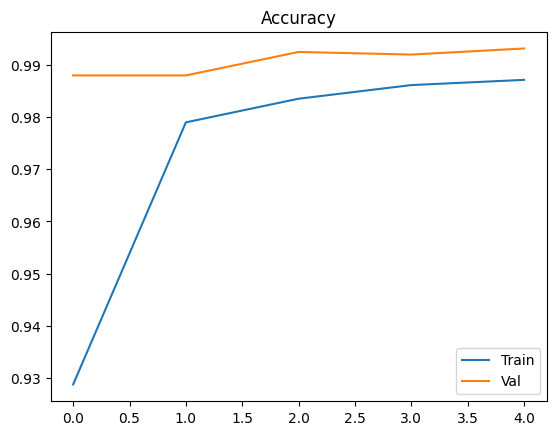

Test Accuracy: 99.41%
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


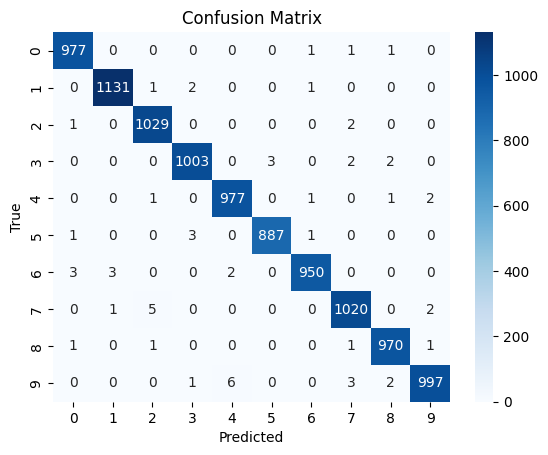

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
sns.countplot(x=y_train); plt.title("Label Distribution"); plt.show()


x_train, x_test = x_train[..., None]/255.0, x_test[..., None]/255.0
y_train = tf.one_hot(y_train, 10); y_test = tf.one_hot(y_test, 10)


plt.imshow(x_train[100, :, :, 0], cmap='gray')
plt.title(f"Label: {tf.argmax(y_train[100])}"); plt.show()


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, 5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(), tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(), tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'), tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-8),
              loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)


plt.plot(history.history['loss'], label='Train'); plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss"); plt.legend(); plt.show()
plt.plot(history.history['accuracy'], label='Train'); plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy"); plt.legend(); plt.show()


test_acc = model.evaluate(x_test, y_test, verbose=0)[1]
print(f"Test Accuracy: {test_acc * 100:.2f}%")

pred = tf.argmax(model.predict(x_test), axis=1)
true = tf.argmax(y_test, axis=1)
cm = tf.math.confusion_matrix(true, pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
plt.title("Confusion Matrix"); plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()


C:\Users\Jaswanth K\AppData\Local\Temp\ipykernel_6384\2407762693.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="muted")


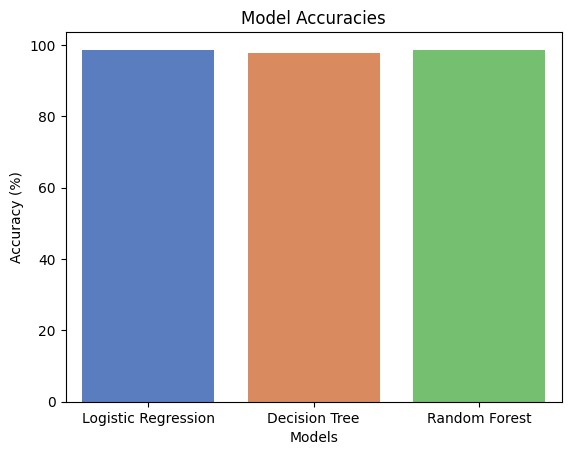

In [20]:
import pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create synthetic dataset
x, y = make_classification(n_samples=10000, n_features=30, weights=[0.99], random_state=1)
x = pd.DataFrame(x); y = pd.Series(y)
x[1] = StandardScaler().fit_transform(x[[1]])  # simulate 'Amount' column standardization

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}
results = {name: accuracy_score(y_test, model.fit(x_train, y_train).predict(x_test)) * 100
           for name, model in models.items()}

# Plot
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="muted")
plt.title("Model Accuracies"); plt.ylabel("Accuracy (%)"); plt.xlabel("Models")
plt.show()


KNN Accuracy: 94.00%


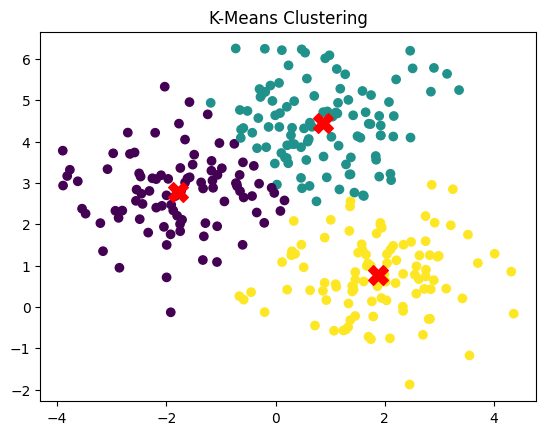

In [22]:
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# --- KNN ---
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)
X = StandardScaler().fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(f"KNN Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# --- K-Means ---
X_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=0)
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_blobs)

plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=200, marker='X')
plt.title("K-Means Clustering")
plt.show()


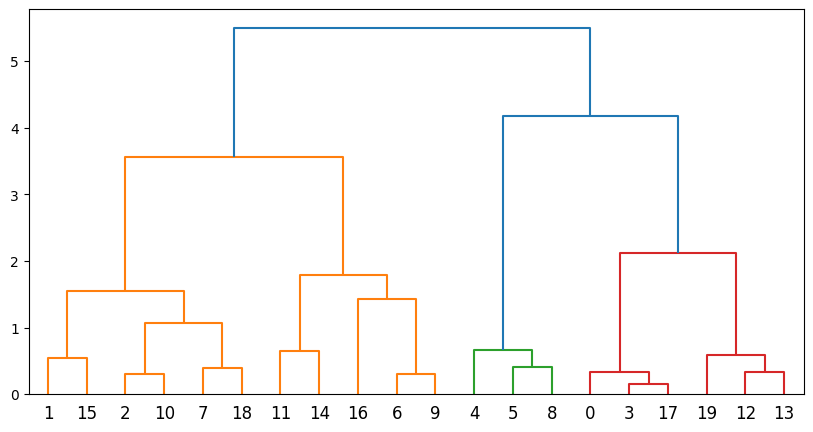

Strategy for Cluster 0: Target with discounts
[ 0  3 17]

Strategy for Cluster 1: Increase variety
[ 1  2  7 10 15 18]

Strategy for Cluster 2: Personalized service
[4 5 8]

Strategy for Cluster 3: Launch new products
[ 6  9 16]

Strategy for Cluster 4: Improve experience
[11 14]

Strategy for Cluster 5: Retention programs
[12 13 19]



In [25]:

import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'CustomerID': np.arange(1, 21),
    'Spending': np.random.randint(100, 1000, 20),
    'Frequency': np.random.randint(1, 50, 20)
})

df = df.drop(columns=['CustomerID'])
df_norm = (df - df.mean()) / df.std()
Z = linkage(df_norm, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

max_d = 6
clusters = pd.Series(cut_tree(Z, n_clusters=max_d).flatten())
df['Cluster'] = clusters

strategy = {
    0: 'Target with discounts',
    1: 'Increase variety',
    2: 'Personalized service',
    3: 'Launch new products',
    4: 'Improve experience',
    5: 'Retention programs'
}

for c in range(max_d):
    print(f"Strategy for Cluster {c}: {strategy[c]}")
    print(df[df['Cluster'] == c].index.values)
    print()


In [26]:
import pandas as pd
from numpy import nan

# Sample user-movie ratings
data = {
    'user_id': [1, 1, 2, 2, 3, 3],
    'Star Wars': [5, nan, 4, nan, 5, 4],
    'Liar Liar': [4, 3, 3, 2, nan, 4],
    'Toy Story': [5, 5, nan, 4, 5, nan]
}
df = pd.DataFrame(data).set_index('user_id')

# Correlation with Star Wars
corr = df.corrwith(df['Star Wars'])
print("Movies similar to Star Wars:\n", corr.sort_values(ascending=False))

# Correlation with Liar Liar
corr = df.corrwith(df['Liar Liar'])
print("\nMovies similar to Liar Liar:\n", corr.sort_values(ascending=False))


Movies similar to Star Wars:
 Star Wars    1.0
Liar Liar    0.5
Toy Story    NaN
dtype: float64

Movies similar to Liar Liar:
 Liar Liar    1.000000
Toy Story    0.866025
Star Wars    0.500000
dtype: float64


C:\Users\Jaswanth K\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Accuracy: 0.85
